In [ ]:
import pandas as pd
import numpy as np

In [6]:
df= pd.read_csv("house_price.csv")
df.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,Bommanahalli,3,1,3000,1,3,28000
1,Bommanahalli,3,1,1650,10,0,18000
2,Whitefield,2,0,1000,5,3,16400
3,Whitefield,3,0,1600,1,9,27000
4,Whitefield,2,1,1200,5,1,20000


# Check Missing Value

In [7]:
df.isnull().sum()

Location      0
BHK           0
Furnishing    0
Sq.ft         0
Old(years)    0
Floor         0
Price         0
dtype: int64

In [9]:
df.shape

(1000, 7)

In [10]:
df.columns

Index(['Location', 'BHK', 'Furnishing', 'Sq.ft', 'Old(years)', 'Floor',
       'Price'],
      dtype='object')

# Data Separation

In [55]:
X= df.loc[:,['Location','BHK', 'Furnishing', 'Sq.ft', 'Old(years)', 'Floor']]
X.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor
0,Bommanahalli,3,1,3000,1,3
1,Bommanahalli,3,1,1650,10,0
2,Whitefield,2,0,1000,5,3
3,Whitefield,3,0,1600,1,9
4,Whitefield,2,1,1200,5,1


In [56]:
y = df["Price"]
y.head()

0    28000
1    18000
2    16400
3    27000
4    20000
Name: Price, dtype: int64

In [57]:
temp=df.describe()
temp

,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.436000,0.348000,1448.613000,4.029000,3.465000,22829.900000
std,0.496135,0.476574,491.272535,3.048845,3.245197,7706.410627
min,2.000000,0.000000,767.000000,1.000000,0.000000,11000.000000
25%,2.000000,0.000000,1089.000000,1.000000,1.000000,16500.000000
50%,2.000000,0.000000,1300.000000,5.000000,3.000000,21000.000000
75%,3.000000,1.000000,1650.000000,5.000000,3.000000,26000.000000
max,3.000000,1.000000,3155.000000,10.000000,13.000000,45000.000000


# Boxplot

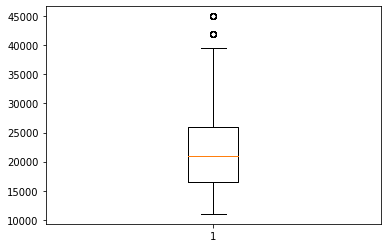

In [58]:
import matplotlib.pyplot as plt
plt.boxplot(df["Price"]);

In [59]:
#IQR
Q3=temp.loc["75%","Price"]
Q3

26000.0

In [60]:
Q1=temp.loc["25%","Price"]
Q1

16500.0

In [61]:
IQR=Q3-Q1
IQR

9500.0

In [62]:
#Upper
upper=Q3+1.5*IQR
upper

40250.0

In [63]:
#Lower
lower=Q1-1.5*IQR
lower

2250.0

# Visualization - Distplot

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


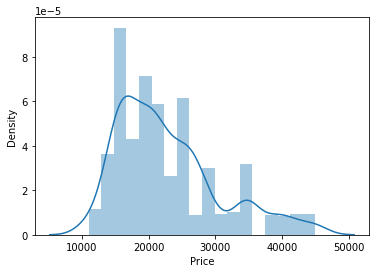

In [64]:
import seaborn as sns
sns.distplot(df["Price"]);

In [65]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
le=LabelEncoder()
ss=StandardScaler()
norm=MinMaxScaler()

In [66]:
X["Location"]=le.fit_transform(X["Location"])

In [73]:
X.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor
0,0,3,1,3000,1,3
1,0,3,1,1650,10,0
2,1,2,0,1000,5,3
3,1,3,0,1600,1,9
4,1,2,1,1200,5,1


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

# Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()

In [70]:
lr.fit(X_train,y_train)

LinearRegression()

In [96]:
pred=lr.predict(X_test)


In [72]:
r2_score(pred,y_test)

0.8175395262557094

# RFC

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [83]:
rfc =  RandomForestClassifier()
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)
accuracy_score(y_test,pred)

1.0

In [84]:
print(accuracy_score(y_test,pred))

1.0


# Decission Tree

In [86]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [87]:
dfr=DecisionTreeRegressor(max_depth=8)
dfr.fit(X_train,y_train)
pred = dfr.predict(X_test)
r2_score(y_test,pred)

0.9989998097226241